In [1]:
# standard library imports
import csv
import datetime as dt
import json
import os
import statistics
import time

# third-party imports
import numpy as np
import pandas as pd
pd.set_option("max_columns", 100)

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
steam_data = pd.read_csv('data/steam_processed.csv')

C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Exploratory Data Analysis
So far I have been "blindly" cleaning the data I have located without any insight on it.  
Time to change that.

In [8]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33638 entries, 0 to 33637
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                33636 non-null  object 
 1   is_free             33636 non-null  object 
 2   controller_support  33636 non-null  float64
 3   dlc                 33636 non-null  float64
 4   developers          33636 non-null  object 
 5   publishers          33636 non-null  object 
 6   demos               33636 non-null  float64
 7   appid               33636 non-null  float64
 8   positive            33636 non-null  float64
 9   negative            33636 non-null  float64
 10  owners              33636 non-null  object 
 11  price               33636 non-null  float64
 12  initialprice        33636 non-null  float64
 13  windows             33636 non-null  object 
 14  mac                 33636 non-null  object 
 15  linux               33636 non-null  object 
 16  rele

This dataset has a lot of object columns, but all of them are either descriptors or True/False columns.  
There is actually one important column that may not make sense as object, and that is `owners`:

In [4]:
steam_data.owners.value_counts()

0 .. 20,000                   18269
20,000 .. 50,000               6199
50,000 .. 100,000              3155
100,000 .. 200,000             2233
200,000 .. 500,000             1985
500,000 .. 1,000,000            861
1,000,000 .. 2,000,000          486
2,000,000 .. 5,000,000          305
5,000,000 .. 10,000,000          81
10,000,000 .. 20,000,000         41
20,000,000 .. 50,000,000         16
50,000,000 .. 100,000,000         4
100,000,000 .. 200,000,000        1
Name: owners, dtype: int64

This column shows the amount of users using ranges, as the actual number is not public anymore.  
Perhaps, that block of numbers explain little and bad, so I will try to make it more explicit:

In [5]:
steam_data.price = steam_data.price/100

In [6]:
steam_data.price

0         9.99
1         4.99
2         4.99
3         4.99
4         4.99
         ...  
33633     9.99
33634     1.99
33635    14.99
33636     4.99
33637     3.99
Name: price, Length: 33638, dtype: float64

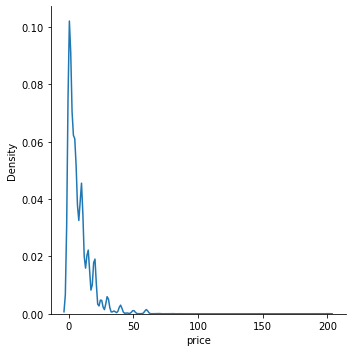

In [7]:
sns.displot(x='price', data=steam_data, kind='kde')
plt.show()